In [186]:
import pandas as pd
data =  pd.read_csv("C:/Users/KATERINE/Documents/cuny classes/DATA ACQ AND MANAGEM/week8/auto-mpg.data", encoding='latin-1', delim_whitespace=True, names=column_names)
df = pd.DataFrame(data, columns= ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])

#inline graphics
%matplotlib inline
import matplotlib.pyplot as plt 

print (data.shape)
data.head(25)

(398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl


In [187]:
#Finding the horsepower missing data and marqued as ?
horsepower_missing_data = data[data.horsepower=='?'].index
data.loc[horsepower_missing_data]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [188]:
#Checking what type of data contains the column horsepower
data.dtypes.horsepower

dtype('O')

In [189]:
#Assigning NaN to the horsepower missing data and changing the datatype to float
data.loc[horsepower_missing_data, 'horsepower'] = float('NaN')
data.loc[horsepower_missing_data]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,NaN,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035.0,20.5,82,1,amc concord dl


In [190]:
#Assigning  the mean value of the column to each missing data
data.horsepower = data.horsepower.apply(pd.to_numeric)
data.loc[horsepower_missing_data, 'horsepower'] = int( data.horsepower.mean() )


In [191]:
#Converting  values on the origin column  to ‘USA’, ‘Asia’, and ‘Europe
def origin_desc(row):
    if row['origin'] == 1:
        return 'USA'
    if row['origin'] == 2:
        return 'ASIA'
    if row['origin'] == 3:
        return 'EUROPE'
    return 'other'

#Creating a new column called 'origin_description'
df['origin_description'] = df.apply(lambda row:origin_desc(row), axis = 1)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,origin_description
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,USA
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500,USA
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala,USA
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii,USA
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina,USA
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl,USA


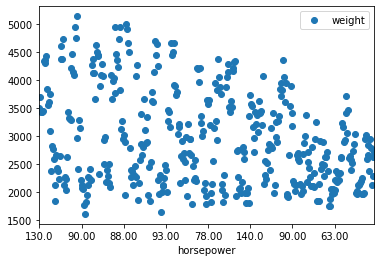

In [192]:
#Creating a scatterplot that shows the relationship between horsepower and weight
df.plot(x= 'horsepower', y='weight', style='o')

In [193]:
#Finding the distribution for cylinders
df['cylinders'] = pd.to_numeric(df['cylinders'], errors='coerce')
distri_cylin = df.pivot_table(index=['cylinders'], aggfunc='size')
print(distri_cylin)

cylinders
3      4
4    204
5      3
6     84
8    103
dtype: int64


In [194]:
#Hist of  the distribution for cylinders
import matplotlib.pyplot as plt
import seaborn as sns

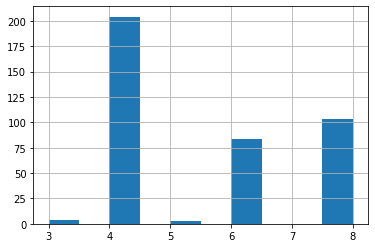

In [195]:
data['cylinders'].hist(bins=10)

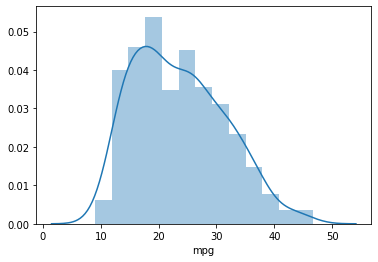

In [196]:
#Data in mpg
sns.distplot(data['mpg'])

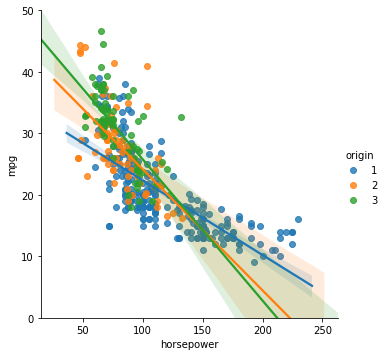

In [197]:
#scatterplot of horsepower vs mpg
variable = 'horsepower'
plot = sns.lmplot(variable,'mpg',data=data,hue='origin')
plot.set(ylim = (0,50))

## Conclusion
USA is the country with more consumption of gas and more horsepower while Europe has more efficient cars which consume less gas than the USA.    

While more horsepower, more gas consumption